In [117]:
import os
import requests
import pandas as pd
import json

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('C://Users//ratan//automated_data_pipeline//scripts//output//stock_data.csv')
data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

display(data)

print(data.columns)



,Open,High,Low,Close,Volume,Daily Range
Date,,,,,,
2024-07-02,174.84,177.4850,174.3200,177.30,2883275,3.1650
2024-07-03,177.88,177.9800,175.1700,175.73,1649049,2.8100
2024-07-05,175.74,176.0900,173.9500,176.02,2085970,2.1400
2024-07-08,176.41,178.5900,176.0100,177.64,2503038,2.5800
2024-07-09,177.60,177.7000,175.5800,176.48,2513305,2.1200
...,...,...,...,...,...,...
2024-11-14,210.00,210.4999,206.3500,208.99,6372853,4.1499
2024-11-15,207.46,208.4900,204.0700,204.99,3986460,4.4200
2024-11-18,207.00,208.4150,205.3701,208.09,3406045,3.0449


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Range'], dtype='object')


In [121]:
print(data.index)


DatetimeIndex(['2024-07-02', '2024-07-03', '2024-07-04', '2024-07-05',
               '2024-07-06', '2024-07-07', '2024-07-08', '2024-07-09',
               '2024-07-10', '2024-07-11',
               ...
               '2024-11-12', '2024-11-13', '2024-11-14', '2024-11-15',
               '2024-11-16', '2024-11-17', '2024-11-18', '2024-11-19',
               '2024-11-20', '2024-11-21'],
              dtype='datetime64[ns]', name='Date', length=143, freq='D')


In [122]:
# Forward-fill to handle missing values
data = data.asfreq('D').fillna(method='ffill')

# Ensure model sees the true value on 2024-11-21
data.loc['2024-11-21', 'Close'] = 222.80

# Use the most recent 3 months of data
train = data.loc['2024-08-01':]


In [123]:
model = ARIMA(train['Close'], order=(5, 1, 0))  # Test orders (5, 1, 0), (1, 1, 1), etc.
model_fit = model.fit()

# Forecast the next 5 days
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

# Align forecast with observed dates
forecast.index = pd.date_range(
    start=data.index[-1] + pd.Timedelta(days=1),
    periods=forecast_steps,
    freq='D'
)

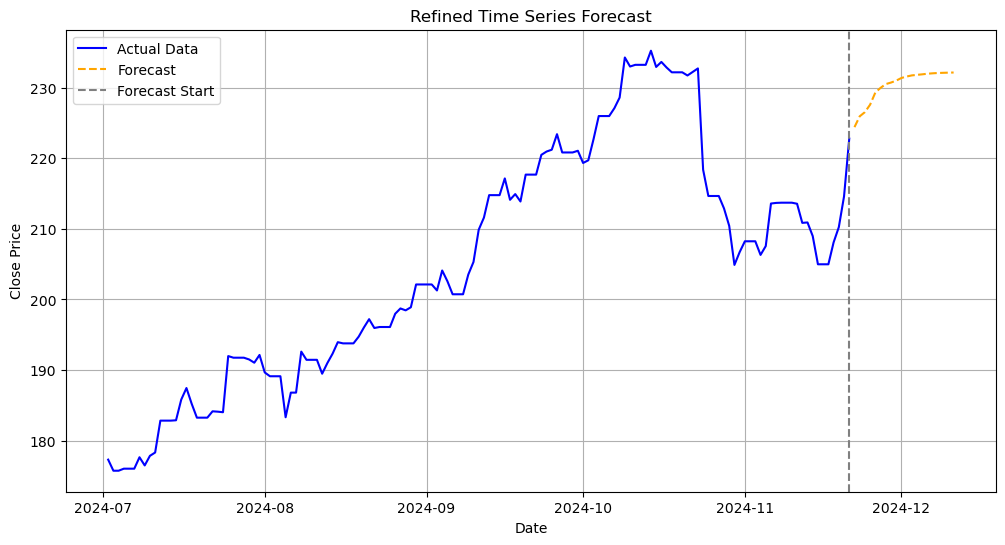

Forecasted Values:
2024-11-22    224.425517
2024-11-23    225.960900
2024-11-24    226.557925
2024-11-25    227.619474
2024-11-26    229.337495
2024-11-27    229.998351
2024-11-28    230.530818
2024-11-29    230.747432
2024-11-30    231.023552
2024-12-01    231.397179
2024-12-02    231.601666
2024-12-03    231.762990
2024-12-04    231.839508
2024-12-05    231.915319
2024-12-06    232.000983
2024-12-07    232.058512
2024-12-08    232.104250
2024-12-09    232.129268
2024-12-10    232.150693
2024-12-11    232.171510
Freq: D, Name: predicted_mean, dtype: float64


In [124]:
# Plot the actual data and forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Data', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', color='orange', linestyle='--')
plt.axvline(x=train.index[-1], color='gray', linestyle='--', label='Forecast Start')

# Add labels and legend
plt.title("Refined Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()

# Show plot
plt.show()

print("Forecasted Values:")
print(forecast)
